# (1)Importing Libaries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sng


# (2)Walkthrough the data set

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# (3) Feature Engineering

### (3.1) Age Column

In [7]:
df['AGE_GROUP']=df['Age'].apply(lambda x:'18-25' if x<26 else '26-40' if 25<x<41 else '41-55' if 40<x<56 else '55+' if 55<x else 0 )
del df['Age']


In [8]:
df.head()

,CustomerID,Genre,Annual Income (k$),Spending Score (1-100),AGE_GROUP
0,1,Male,15,39,18-25
1,2,Male,15,81,18-25
2,3,Female,16,6,18-25
3,4,Female,16,77,18-25
4,5,Female,17,40,26-40


### (3.2) Annual Income Column

In [9]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [10]:
df['Annual Income (k$)'].nunique()

64

(array([32., 26., 40., 44., 36., 14.,  4.,  4.]),
 array([ 15.  ,  30.25,  45.5 ,  60.75,  76.  ,  91.25, 106.5 , 121.75,
        137.  ]),
 <BarContainer object of 8 artists>)

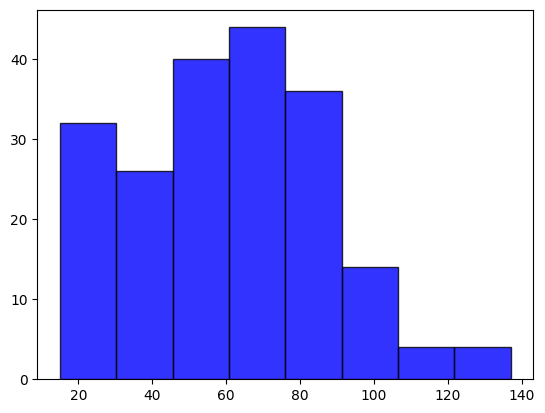

In [11]:
plt.hist(df['Annual Income (k$)'],color='blue',bins=8,edgecolor='black',alpha=0.8)

In [12]:
df['Income_Range']=df['Annual Income (k$)'].apply(lambda x:'15-25' if x<26 else '26-50' if 25<x<51 else '51-80' if 50<x<81 else '81-100' if 80<x<101 else '100+' if 100<x else 0)

del df['Annual Income (k$)']

In [13]:
df.head()

,CustomerID,Genre,Spending Score (1-100),AGE_GROUP,Income_Range
0,1,Male,39,18-25,15-25
1,2,Male,81,18-25,15-25
2,3,Female,6,18-25,15-25
3,4,Female,77,18-25,15-25
4,5,Female,40,26-40,15-25


### (3.3) Spending Score (1-100) Column

In [14]:
df['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [15]:
df['Spending Score (1-100)'].max()

99

In [16]:
df['Spending Score (1-100)'].min()

1

In [17]:
df['Score_Range']=df['Spending Score (1-100)'].apply(lambda x:'01-10' if x<11 else '11-30' if 10<x<31 else '31-60' if 30<x<61 else '61-80' if 60<x<81 else '81+' if 80<x else 0)

del df['Spending Score (1-100)']

In [18]:
df.head()

,CustomerID,Genre,AGE_GROUP,Income_Range,Score_Range
0,1,Male,18-25,15-25,31-60
1,2,Male,18-25,15-25,81+
2,3,Female,18-25,15-25,01-10
3,4,Female,18-25,15-25,61-80
4,5,Female,26-40,15-25,31-60


# (4) Analyze the Genre Column

In [19]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: title={'center': 'PIE_CHART'}>

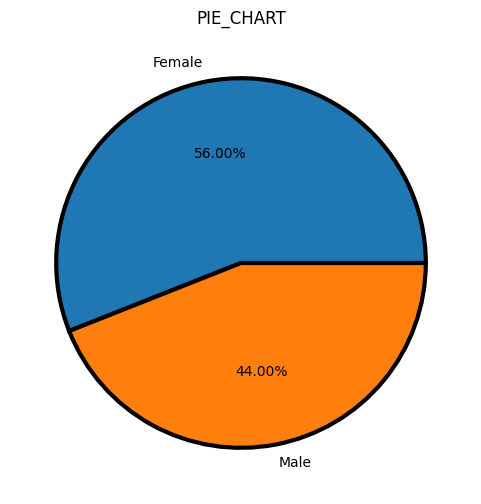

In [20]:
df.groupby('Genre').size().plot(kind="pie",autopct="%.2f%%",figsize=(6,6),wedgeprops={"edgecolor":"black","linewidth":3},title="PIE_CHART")

<Axes: title={'center': 'PIE_CHART'}, xlabel='Genre'>

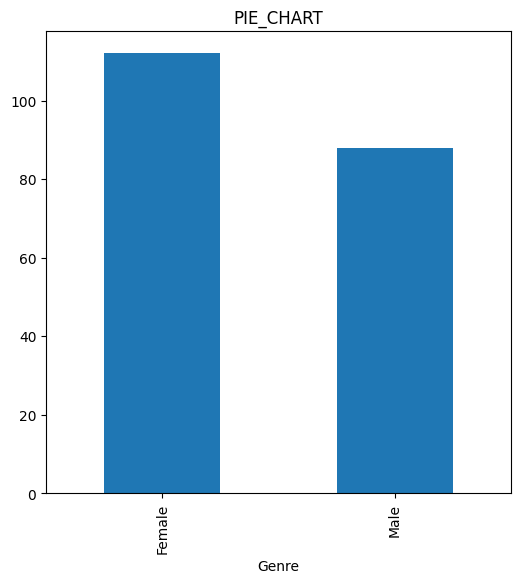

In [21]:
df.groupby('Genre').size().plot(kind="bar",figsize=(6,6),title="PIE_CHART")

# (5) Analyze the AGE_GROUP Column

In [22]:
df['AGE_GROUP'].unique()

array(['18-25', '26-40', '55+', '41-55'], dtype=object)

<Axes: xlabel='AGE_GROUP'>

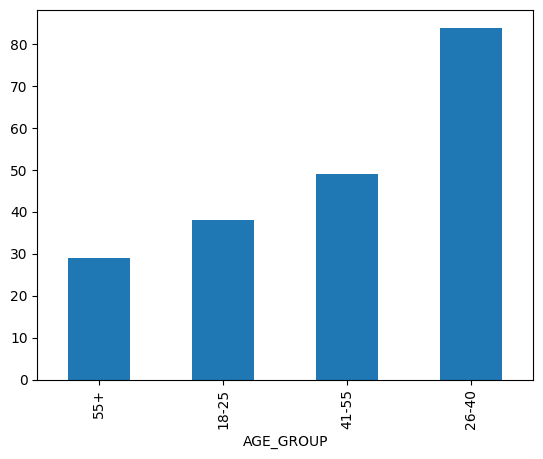

In [23]:
df.groupby('AGE_GROUP').size().sort_values().plot(kind='bar')

<Axes: xlabel='AGE_GROUP', ylabel='count'>

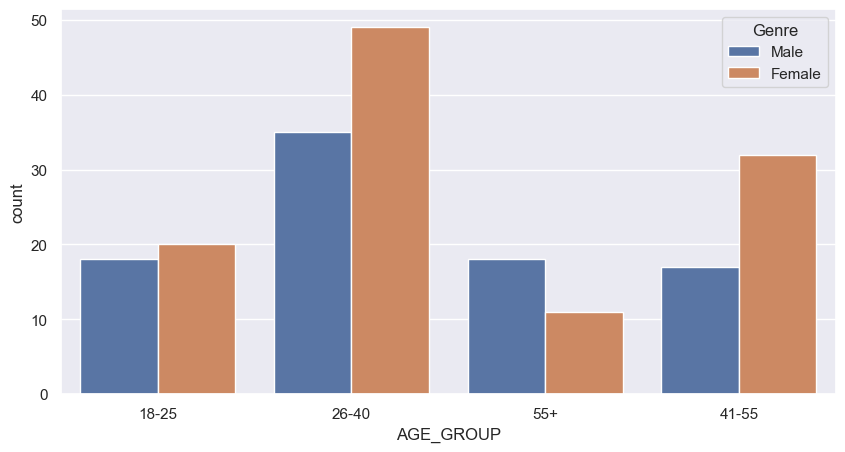

In [24]:
sng.set(rc={'figure.figsize':(10,5)})
sng.countplot(x=df['AGE_GROUP'],hue=df['Genre'])

<Axes: >

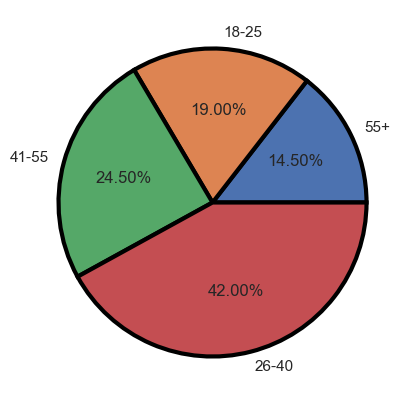

In [25]:
df.groupby('AGE_GROUP').size().sort_values().plot(kind='pie',autopct='%1.2f%%',wedgeprops={'edgecolor':'black','linewidth':3,'antialiased':True})

# (6) Analyze  Income_Range Column

In [26]:
df['Income_Range'].unique()

array(['15-25', '26-50', '51-80', '81-100', '100+'], dtype=object)

<Axes: xlabel='Income_Range'>

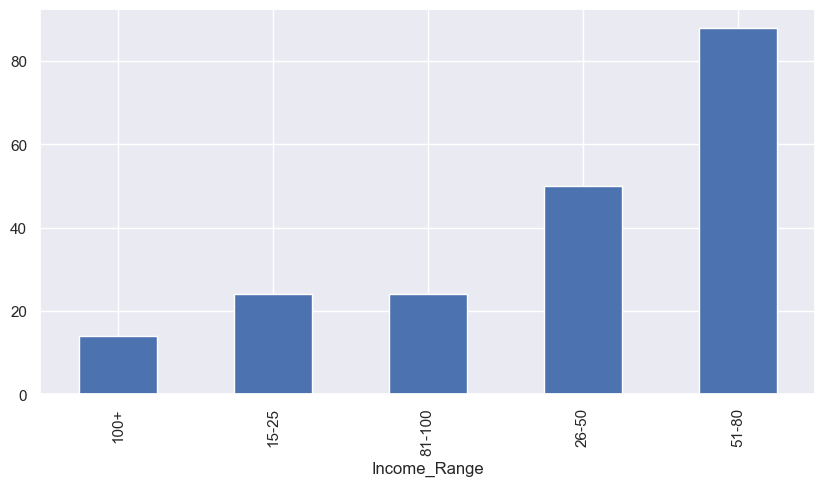

In [27]:
df.groupby('Income_Range').size().sort_values().plot(kind='bar')

<Axes: >

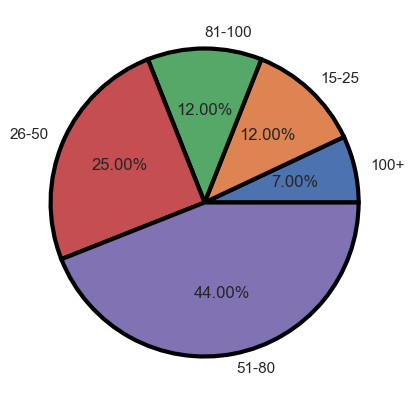

In [28]:
df.groupby('Income_Range').size().sort_values().plot(kind='pie',autopct='%1.2f%%',wedgeprops={'edgecolor':'black','linewidth':3,'antialiased':True})

<Axes: xlabel='Income_Range', ylabel='count'>

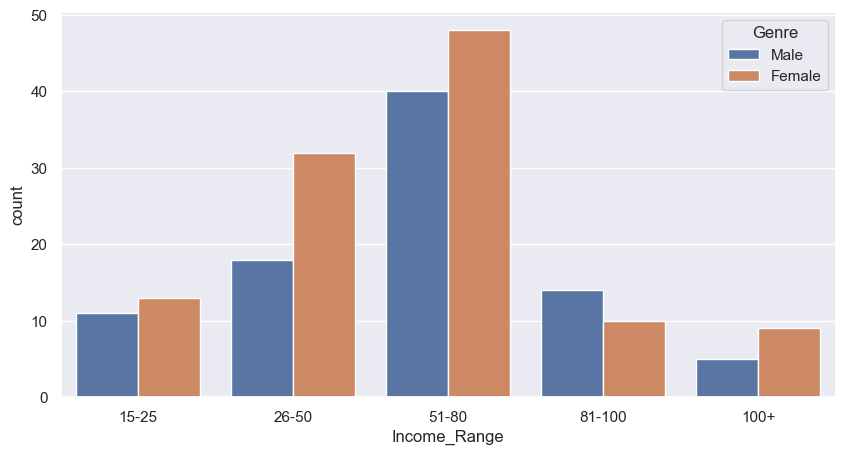

In [29]:
sng.set(rc={'figure.figsize':(10,5)})
sng.countplot(x=df['Income_Range'],hue=df['Genre'])

<Axes: xlabel='Income_Range', ylabel='count'>

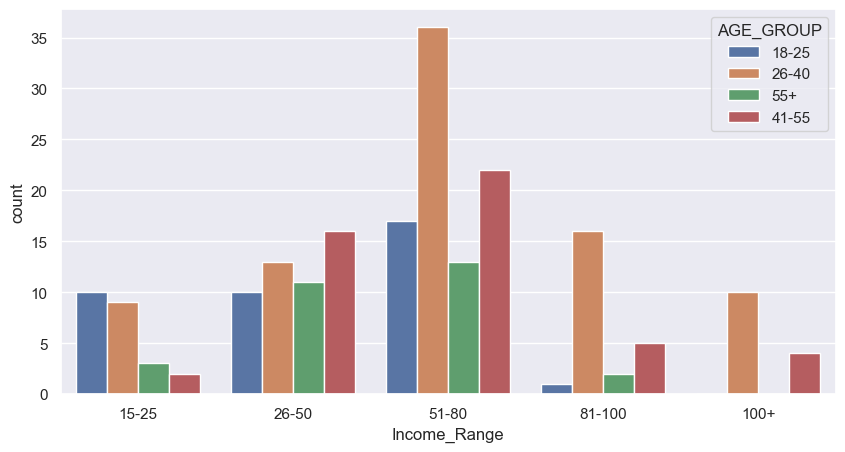

In [30]:
sng.set(rc={'figure.figsize':(10,5)})
sng.countplot(x=df['Income_Range'],hue=df['AGE_GROUP'])

# (7) Analyze Score_Range Column

In [31]:
df['Score_Range'].unique()

array(['31-60', '81+', '01-10', '61-80', '11-30'], dtype=object)

<Axes: xlabel='Score_Range'>

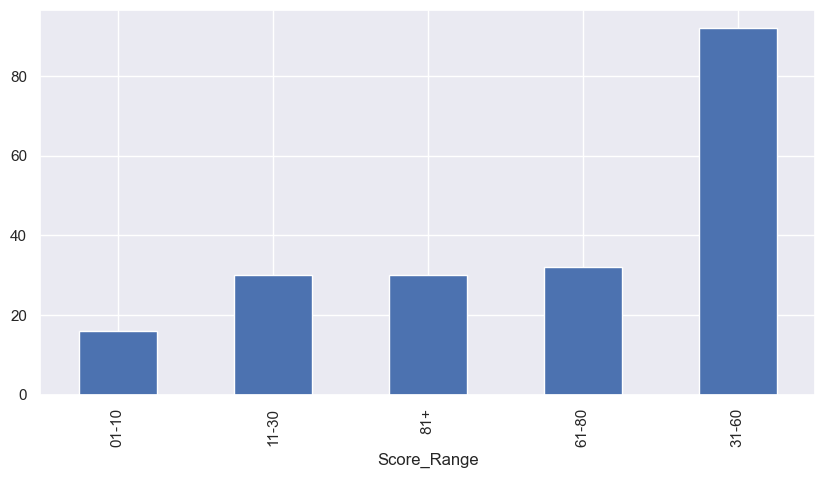

In [32]:
df.groupby('Score_Range').size().sort_values().plot(kind='bar')

<Axes: >

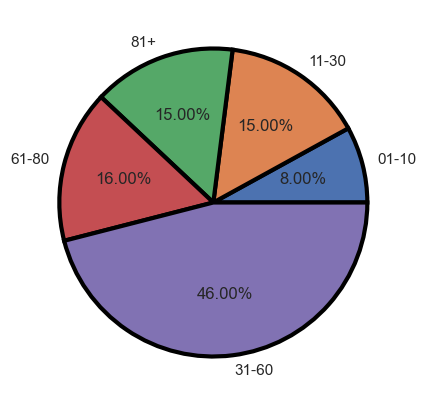

In [33]:
df.groupby('Score_Range').size().sort_values().plot(kind='pie',autopct='%1.2f%%',wedgeprops={'edgecolor':'black','linewidth':3,'antialiased':True})

<Axes: xlabel='Score_Range', ylabel='count'>

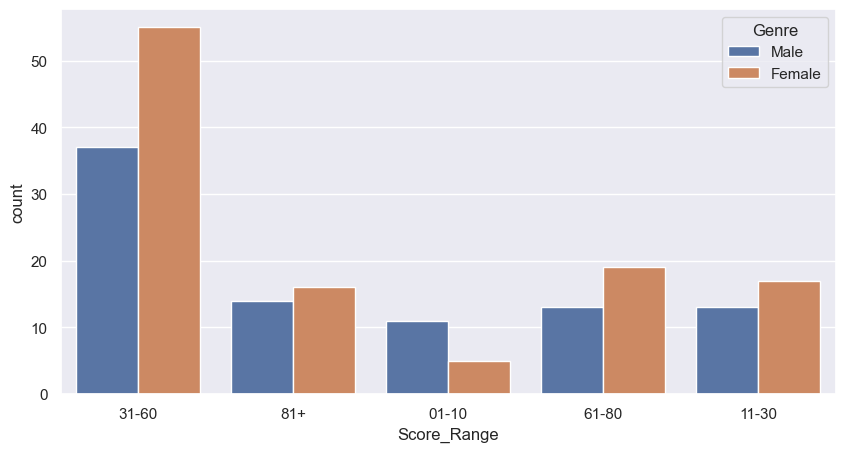

In [34]:
sng.set(rc={'figure.figsize':(10,5)})
sng.countplot(x=df['Score_Range'],hue=df['Genre'])

<Axes: xlabel='Score_Range', ylabel='count'>

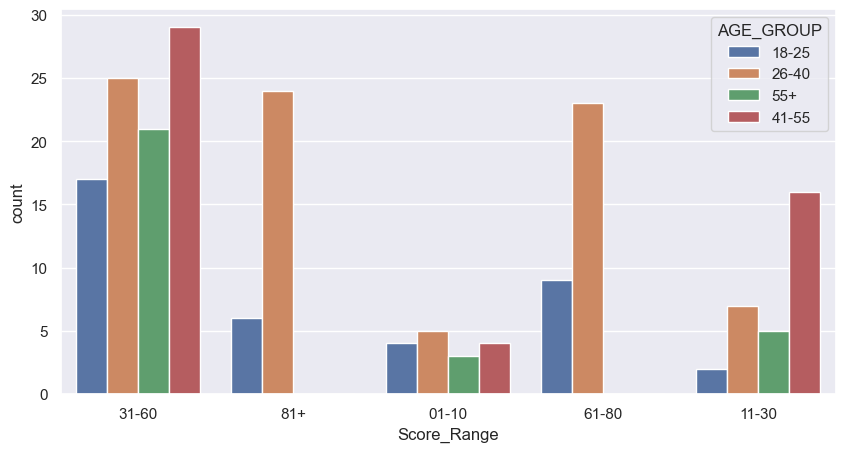

In [35]:
sng.set(rc={'figure.figsize':(10,5)})
sng.countplot(x=df['Score_Range'],hue=df['AGE_GROUP'])